In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
sns.set_style('whitegrid')

In C:\Users\jbrun\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\jbrun\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\jbrun\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\jbrun\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\jbrun\Ap

In [2]:
data_path = pathlib.Path('data', 'monthly_data.csv')
data = pd.read_csv(data_path)
data

,Month,County,Category Name,Transactions,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Month Start
0,2017-11,Adair,American Vodkas,1,14.750000,22.130000,2,0.00,3.50,0.92,2017-11-01
1,2017-11,Black Hawk,100% Agave Tequila,31,24.425806,36.640645,193,6780.95,133.92,35.44,2017-11-01
2,2017-11,Black Hawk,Aged Dark Rum,2,11.195000,16.795000,13,229.67,10.00,2.64,2017-11-01
3,2017-11,Black Hawk,American Brandies,30,5.792667,8.690667,313,1826.50,156.10,41.26,2017-11-01
4,2017-11,Black Hawk,American Cordials & Liqueurs,26,6.878462,10.318846,192,2005.96,147.13,38.90,2017-11-01
...,...,...,...,...,...,...,...,...,...,...,...
131942,2020-11,Wright,Temporary & Specialty Packages,4,8.452500,12.682500,40,500.04,30.00,7.90,2020-11-01
131943,2020-11,Wright,Tennessee Whiskies,16,17.402500,26.106875,255,5750.82,187.10,49.34,2020-11-01
131944,2020-11,Wright,Triple Sec,3,3.226667,4.840000,36,174.24,33.00,8.71,2020-11-01
131945,2020-11,Wright,Whiskey Liqueur,41,10.578537,15.869512,903,7344.40,297.15,78.25,2020-11-01


In [2]:


population_data_path = pathlib.Path('data', 'population_2019.xlsx')
population_data = pd.read_excel(population_data_path)
population_data = population_data[population_data['County'].str.contains('County')]
population_data['County'] = population_data['County'].str.replace('County, Iowa', '')
population_data['County'] = population_data['County'].str.strip()
population_data['County'] = population_data['County'].str.replace('.','')
population_mapper = population_data.set_index('County')['Population'].to_dict()

counties_missing = set(data['County'].unique()) - set(population_mapper.keys())

county_conversions = {
    'Buena Vist': 'Buena Vista',
    'Cerro Gord': 'Cerro Gordo',
    'Obrien': "O'Brien",
    'Pottawatta': 'Pottawattamie',
}

data = data[data['County'] != 'El Paso']
myfilter = data['County'].isin(counties_missing)
data.loc[myfilter, 'County'] = data.loc[myfilter, 'County'].map(county_conversions)

data['Month Start'] = pd.to_datetime(data['Month Start'])
data = data[data['Month Start'] > pd.to_datetime('11/30/2017')]

top_categories = data.groupby('Category Name')['Volume Sold (Gallons)'].sum().nlargest(25).index.tolist()
myfilter = data['Category Name'].isin(top_categories)
data = data[myfilter]

data = data.reset_index(drop = True)

C:\Users\jbrun\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  if __name__ == '__main__':


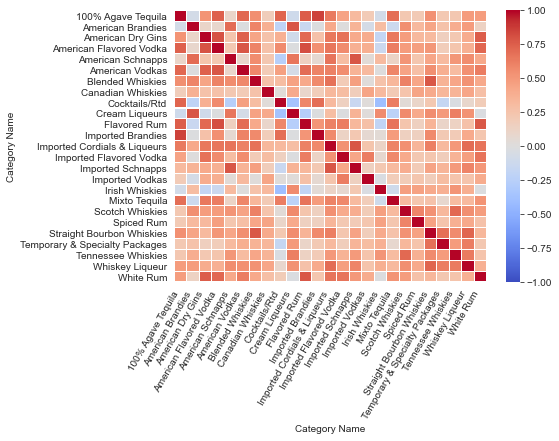

In [3]:
category_correlation = data.groupby(['Category Name', 'Month Start'])['Volume Sold (Gallons)'].sum()
category_correlation = category_correlation.reset_index()
category_correlation = category_correlation.pivot(
    index = 'Month Start',
    columns = 'Category Name',
    values = 'Volume Sold (Gallons)',
)

category_correlation = category_correlation.fillna(0)
category_correlation = category_correlation.corr()

fig, ax = plt.subplots(1, 1, figsize = (7, 5))

sns.heatmap(
    category_correlation,
    vmin = -1,
    vmax = 1,
    cmap = 'coolwarm',
    linewidths = 0.1,
)

ax.tick_params(axis = 'x', rotation = 60, labelright = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60, ha = 'right')

plt.show()

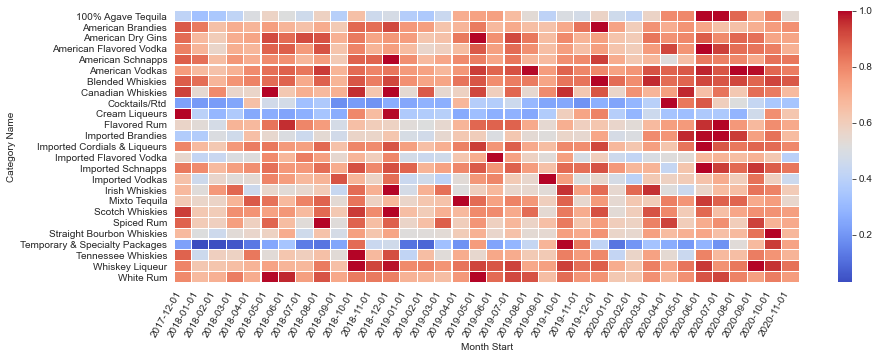

In [4]:
sales_trends = data.groupby(['Category Name', 'Month Start'])['Volume Sold (Gallons)'].sum()
sales_trends = sales_trends.reset_index()
sales_trends = sales_trends.pivot(
    index = 'Category Name',
    columns = 'Month Start',
    values = 'Volume Sold (Gallons)',
)
sales_trends.columns = sales_trends.columns.astype(str)
sales_trends = sales_trends.divide(sales_trends.max(axis = 1), axis = 0)

fig, ax = plt.subplots(1, 1, figsize = (14, 5))

sns.heatmap(
    sales_trends,
    cmap = 'coolwarm',
    linewidths = 0.1,
)

ax.tick_params(axis = 'x', rotation = 60, labelright = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60, ha = 'right')

plt.show()

In [5]:
unique_categories = data['Category Name'].unique().tolist()
unique_categories

['100% Agave Tequila',
 'American Brandies',
 'American Dry Gins',
 'American Flavored Vodka',
 'American Schnapps',
 'American Vodkas',
 'Blended Whiskies',
 'Canadian Whiskies',
 'Cocktails/Rtd',
 'Cream Liqueurs',
 'Flavored Rum',
 'Imported Brandies',
 'Imported Cordials & Liqueurs',
 'Imported Flavored Vodka',
 'Imported Schnapps',
 'Imported Vodkas',
 'Irish Whiskies',
 'Mixto Tequila',
 'Scotch Whiskies',
 'Spiced Rum',
 'Straight Bourbon Whiskies',
 'Tennessee Whiskies',
 'Whiskey Liqueur',
 'White Rum',
 'Temporary & Specialty Packages']

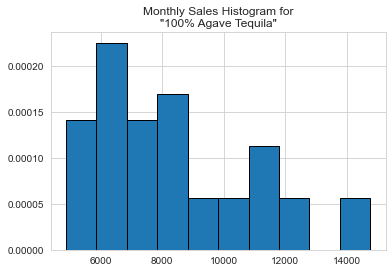

In [6]:
current_category = unique_categories[0]
current_category

fig, ax = plt.subplots(1, 1, figsize = (6, 4))

category_data = data[data['Category Name'] == current_category]
category_data = category_data.groupby('Month Start')['Volume Sold (Gallons)'].sum()
ax.hist(
    category_data.values,
    bins = 10,
    edgecolor = 'k',
    density = True,
)

ax.set_title(f'Monthly Sales Histogram for\n"{current_category}"')

plt.show()

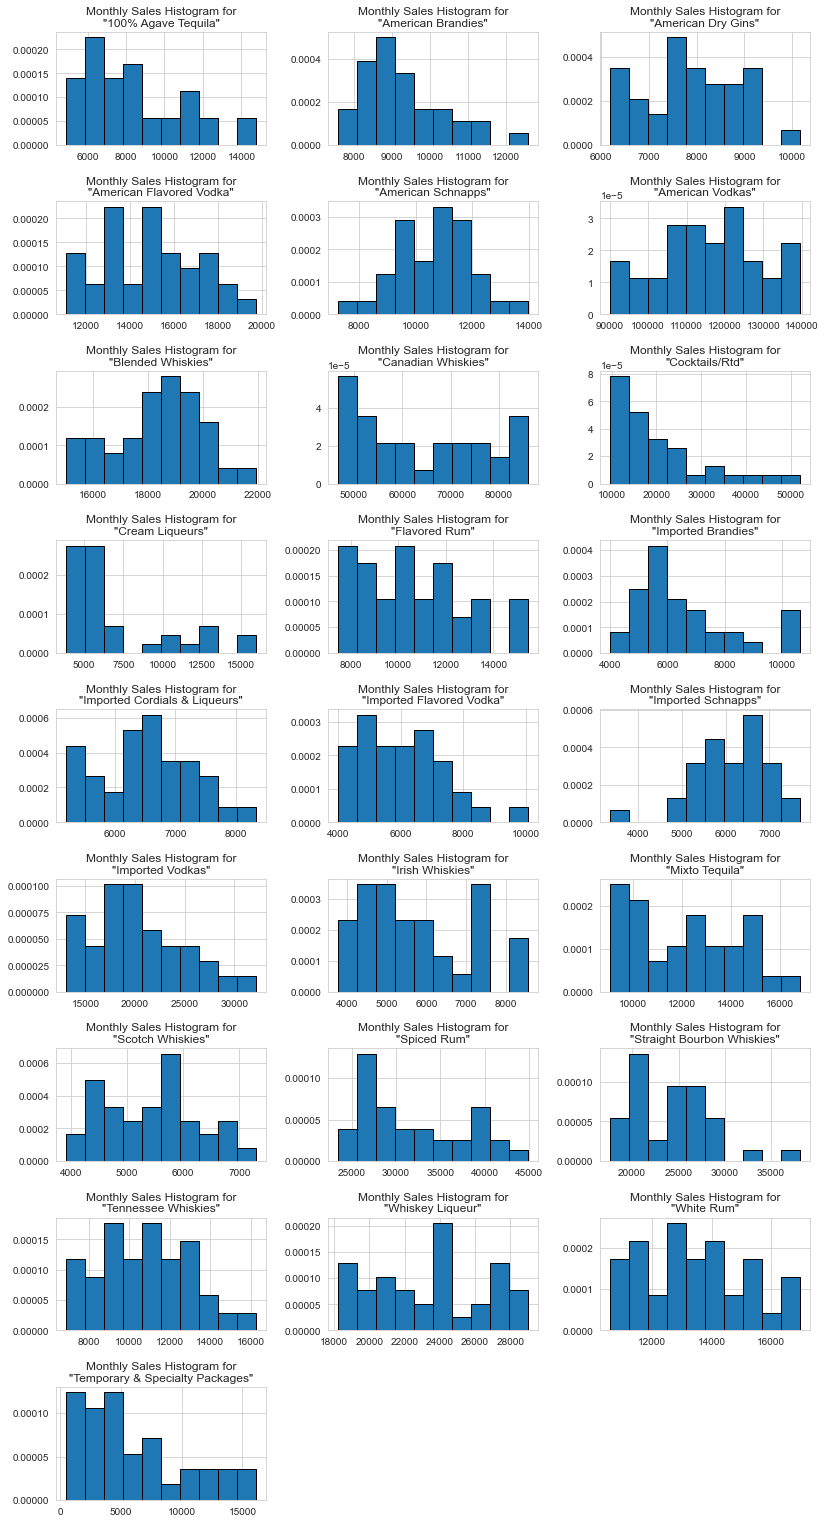

In [7]:
n_cols = 3
n_rows = len(unique_categories)//n_cols + 1

width_multiplier = 4.5
height_muliplier = 3
size_tuple = (width_multiplier*n_cols, height_muliplier*n_rows)

fig, ax = plt.subplots(n_rows, n_cols, figsize = size_tuple)

for current_ax, current_category in zip(ax.ravel(), unique_categories):
    
    category_data = data[data['Category Name'] == current_category]
    category_data = category_data.groupby('Month Start')['Volume Sold (Gallons)'].sum()
    current_ax.hist(
        category_data.values,
        bins = 10,
        edgecolor = 'k',
        density = True,
    )

    current_ax.set_title(f'Monthly Sales Histogram for\n"{current_category}"')
    
for current_ax in ax.ravel():
    if not current_ax.has_data():
        current_ax.axis('off')

plt.subplots_adjust(wspace = 0.3, hspace = 0.5)
#plt.savefig('histogram_plot.pdf', bbox_inches = 'tight')
plt.show()

# Bokeh

In [8]:
temp = data.groupby('Month Start')['Transactions'].sum().reset_index()
temp = temp.reset_index()
temp['index'] = temp['index'] + 1
temp.dtypes

index                    int64
Month Start     datetime64[ns]
Transactions             int64
dtype: object

In [9]:
temp.head()

,index,Month Start,Transactions
0,1,2017-12-01,191389
1,2,2018-01-01,173029
2,3,2018-02-01,151429
3,4,2018-03-01,171070
4,5,2018-04-01,171426


In [11]:
x_vals = temp['index'].tolist()
y_vals = temp['Transactions'].tolist()

In [45]:
from bokeh.plotting import figure, show, save
from bokeh.io import output_notebook, reset_output, output_file
from bokeh.models import NumeralTickFormatter, ColumnDataSource, HoverTool

In [15]:
output_notebook()

Loading BokehJS ...

In [31]:
temp.columns

Index(['index', 'Month Start', 'Transactions'], dtype='object')

In [46]:
reset_output()

In [47]:
output_notebook()

Loading BokehJS ...

In [60]:
source = ColumnDataSource(temp)

p = figure(
    height = 300,
    width = 800,
    x_axis_type = 'datetime',
    tools = 'save, hover, wheel_zoom, box_zoom, pan'
)

p.line(
    x = 'Month Start',
    y = 'Transactions',
    line_width = 2,
    source = source,
)

hover = HoverTool(
    tooltips = [
        ('Period', '@{Month Start}{%m/%d/%Y}'),
        ('Total Trasactions', '@Transactions')
    ],
    formatters = {
        '@{Month Start}': 'datetime'
    }
)
p.add_tools(hover)

p.yaxis.formatter = NumeralTickFormatter(format = "0.2 a")

#output_file('test.html')

#save(p)
show(p)